In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
import warnings
import pickle

In [ ]:
df = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
179009,12,CASH_IN,200271.90,C1829080213,3896164.44,4096436.33,C1769155229,531167.90,690790.44,0.0,0.0
179010,12,CASH_IN,266616.13,C1119089903,4096436.33,4363052.46,C859300166,6064698.49,6080565.41,0.0,0.0
179011,12,CASH_IN,194735.24,C595356999,4363052.46,4557787.70,C803648645,288407.25,152597.27,0.0,0.0
179012,12,CASH_IN,61212.03,C1705359203,4557787.70,4618999.73,C60296041,2492638.18,2620615.37,0.0,0.0


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.drop(['isFlaggedFraud'],axis=1,inplace =True)

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
179009,12,CASH_IN,200271.90,C1829080213,3896164.44,4096436.33,C1769155229,531167.90,690790.44,0.0
179010,12,CASH_IN,266616.13,C1119089903,4096436.33,4363052.46,C859300166,6064698.49,6080565.41,0.0
179011,12,CASH_IN,194735.24,C595356999,4363052.46,4557787.70,C803648645,288407.25,152597.27,0.0
179012,12,CASH_IN,61212.03,C1705359203,4557787.70,4618999.73,C60296041,2492638.18,2620615.37,0.0


In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
179009,12,CASH_IN,200271.90,C1829080213,3896164.44,4096436.33,C1769155229,531167.90,690790.44,0.0
179010,12,CASH_IN,266616.13,C1119089903,4096436.33,4363052.46,C859300166,6064698.49,6080565.41,0.0
179011,12,CASH_IN,194735.24,C595356999,4363052.46,4557787.70,C803648645,288407.25,152597.27,0.0
179012,12,CASH_IN,61212.03,C1705359203,4557787.70,4618999.73,C60296041,2492638.18,2620615.37,0.0
179013,12,CASH_IN,16.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
plt.style.use('ggplot')
warnings.filterwarnings('ignore')


In [ ]:
df_numeric_for_corr = df.copy()
df_numeric_for_corr.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
df_numeric_for_corr.dropna(inplace=True)

label_encoder = LabelEncoder()
df_numeric_for_corr['type'] = label_encoder.fit_transform(df_numeric_for_corr['type'])

correlation_matrix= df_numeric_for_corr.corr()
correlation_matrix

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.087140,0.053716,-0.003387,-0.002984,0.020696,0.007400,-0.042704
type,-0.087140,1.000000,0.096818,-0.357027,-0.371258,-0.156384,-0.114242,0.013833
amount,0.053716,0.096818,1.000000,-0.019359,-0.023891,0.223895,0.349275,0.036239
oldbalanceOrg,-0.003387,-0.357027,-0.019359,1.000000,0.998970,0.097961,0.066721,-0.002824
newbalanceOrig,-0.002984,-0.371258,-0.023891,0.998970,1.000000,0.099503,0.065720,-0.008649
oldbalanceDest,0.020696,-0.156384,0.223895,0.097961,0.099503,1.000000,0.949306,-0.008282
newbalanceDest,0.007400,-0.114242,0.349275,0.066721,0.065720,0.949306,1.000000,-0.005282
isFraud,-0.042704,0.013833,0.036239,-0.002824,-0.008649,-0.008282,-0.005282,1.000000


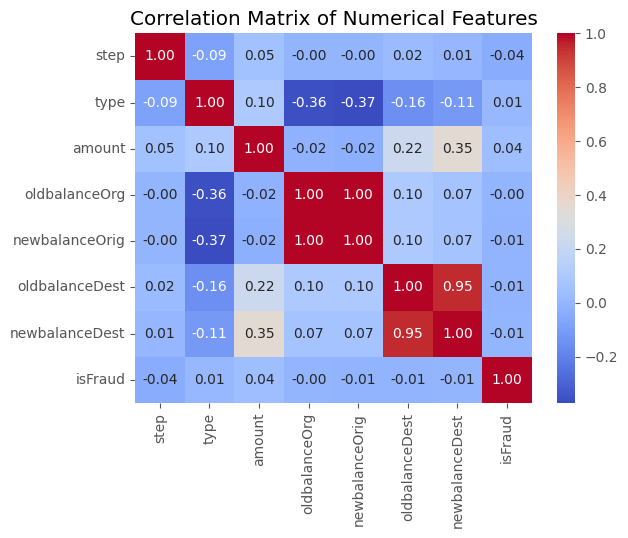

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

<Axes: xlabel='step', ylabel='Count'>

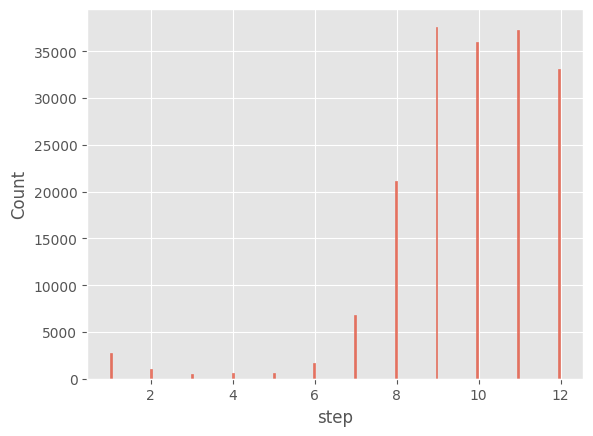

In [ ]:
sns.histplot(data=df,x='step')

<Axes: xlabel='step'>

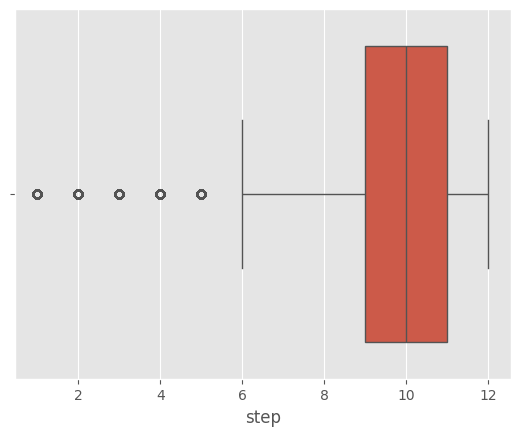

In [ ]:
sns.boxplot(data=df, x='step')

<Axes: xlabel='type', ylabel='count'>

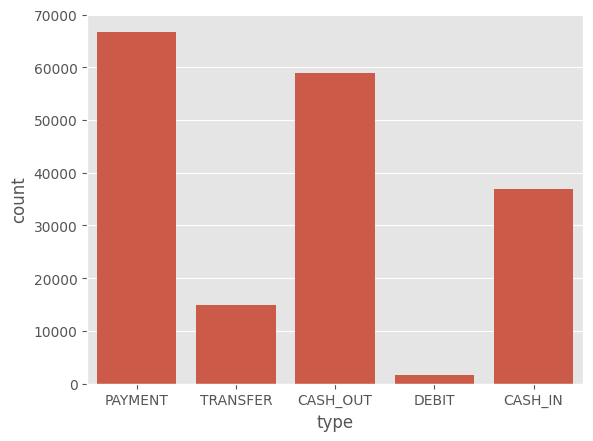

In [ ]:
sns.countplot(data=df, x='type')

<Axes: xlabel='amount', ylabel='Count'>

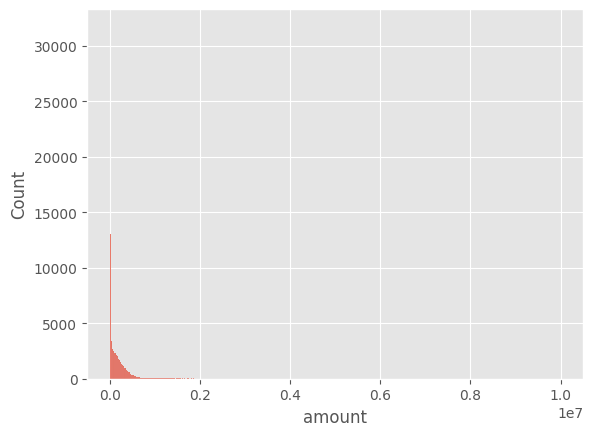

In [ ]:
sns.histplot(data=df,x='amount')

<Axes: xlabel='amount'>

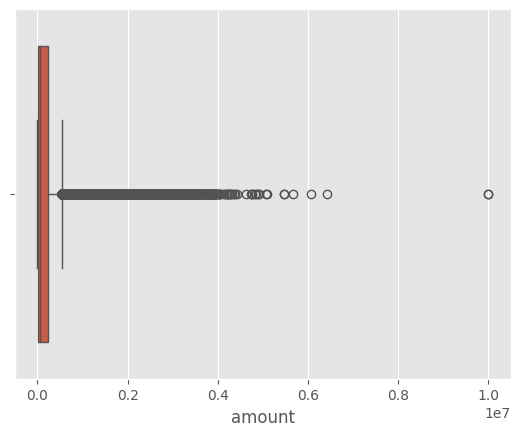

In [ ]:
sns.boxplot(data=df, x='amount')

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

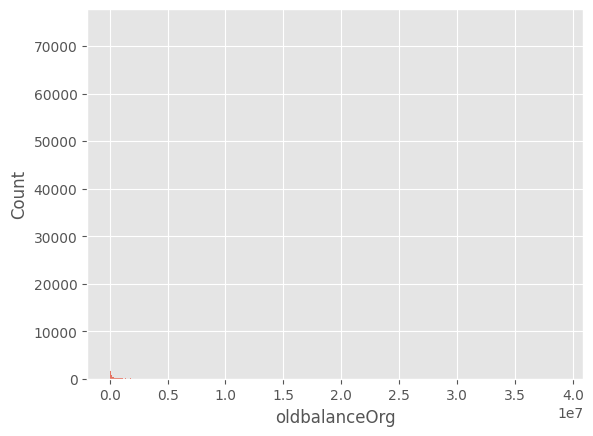

In [ ]:
sns.histplot(df,x="oldbalanceOrg")

In [ ]:
df['nameDest'].value_counts()

,count
nameDest,
C985934102,81
C1286084959,80
C248609774,75
C1590550415,74
C2083562754,74
...,...
C856483013,1
M229502821,1
M1246844215,1


<Axes: xlabel='oldbalanceOrg'>

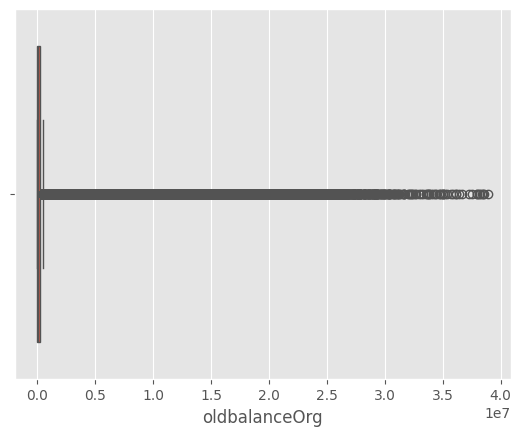

In [ ]:
sns.boxplot(data=df, x='oldbalanceOrg')

<Axes: xlabel='newbalanceOrig'>

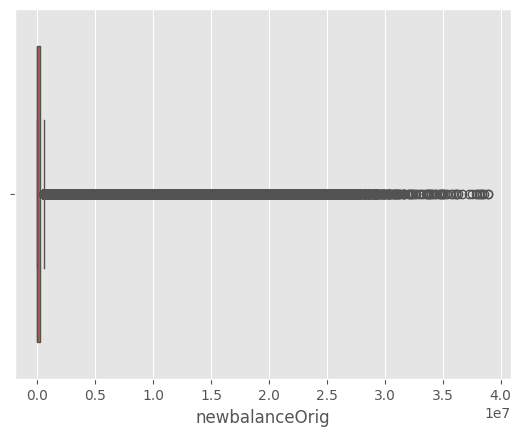

In [ ]:
sns.boxplot(data=df, x='newbalanceOrig')

<Axes: xlabel='isFraud', ylabel='count'>

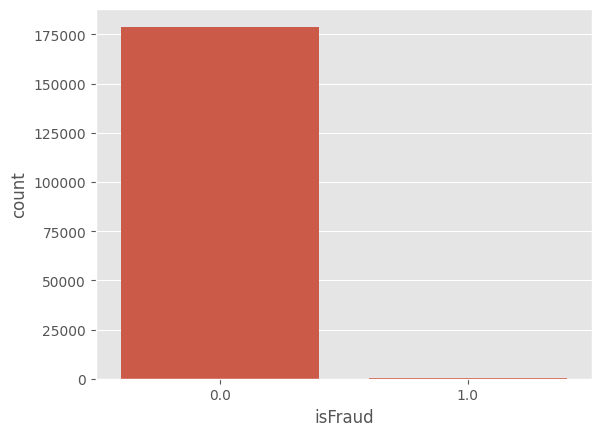

In [ ]:
sns.countplot(data=df, x='isFraud')

In [ ]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,178874
1.0,139


In [ ]:
df.loc[df['isFraud']==0, 'isFraud']= 'is not fraud'
df.loc[df['isFraud']==1, 'isFraud']= 'is fraud'
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,is not fraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,is not fraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,is fraud
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,is fraud
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,is not fraud
...,...,...,...,...,...,...,...,...,...,...
179009,12,CASH_IN,200271.90,C1829080213,3896164.44,4096436.33,C1769155229,531167.90,690790.44,is not fraud
179010,12,CASH_IN,266616.13,C1119089903,4096436.33,4363052.46,C859300166,6064698.49,6080565.41,is not fraud
179011,12,CASH_IN,194735.24,C595356999,4363052.46,4557787.70,C803648645,288407.25,152597.27,is not fraud
179012,12,CASH_IN,61212.03,C1705359203,4557787.70,4618999.73,C60296041,2492638.18,2620615.37,is not fraud


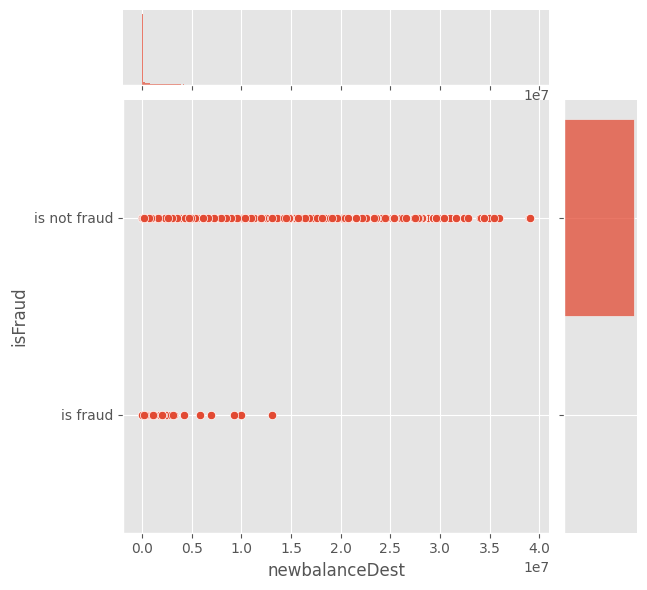

In [ ]:
sns.jointplot(data=df,x='newbalanceDest',y='isFraud')

<Axes: xlabel='isFraud', ylabel='count'>

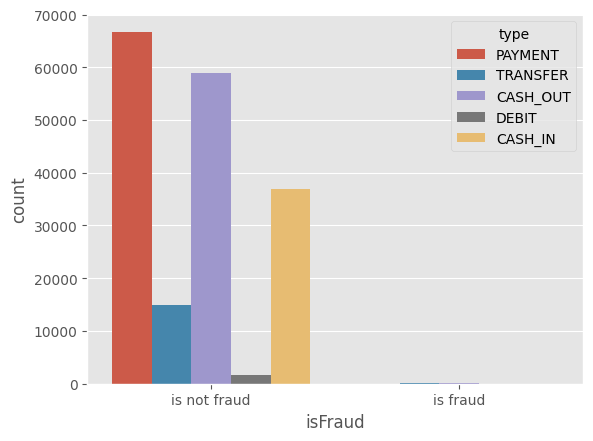

In [ ]:
sns.countplot(data=df, x='isFraud', hue='type')

<Axes: xlabel='isFraud', ylabel='step'>

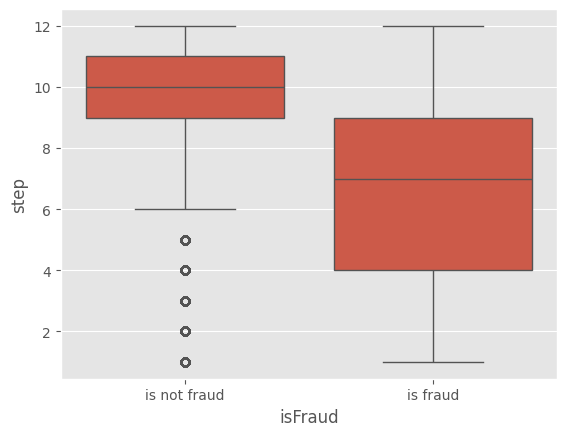

In [ ]:
sns.boxplot(data=df,x='isFraud',y='step')

<Axes: xlabel='isFraud', ylabel='amount'>

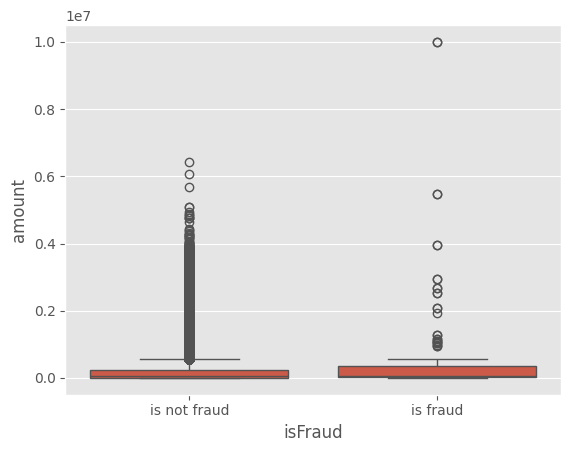

In [ ]:
sns.boxplot(data=df,x='isFraud',y='amount')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

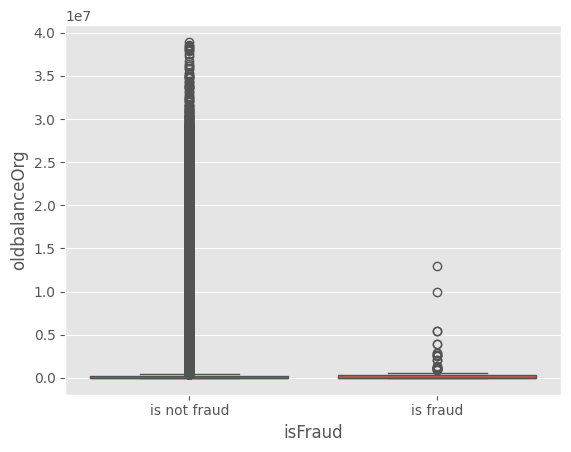

In [ ]:
sns.boxplot(data=df,x='isFraud',y='oldbalanceOrg')

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

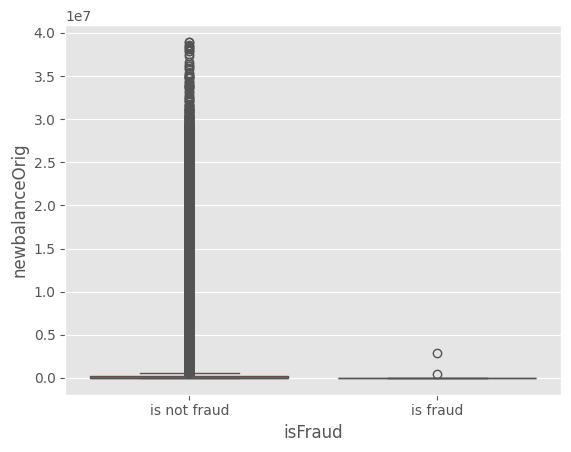

In [ ]:
sns.boxplot(data=df,x='isFraud',y='newbalanceOrig')

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

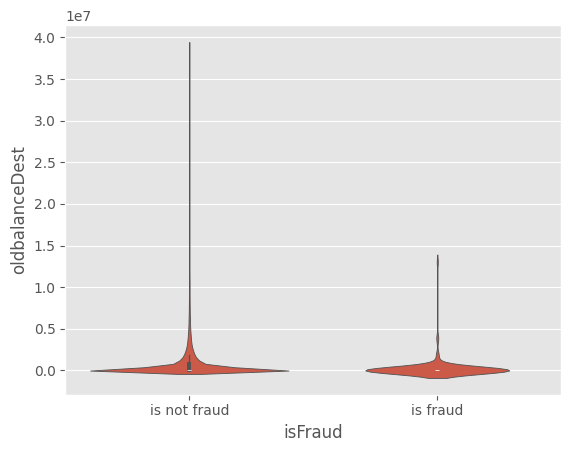

In [ ]:
sns.violinplot(data=df,x='isFraud',y='oldbalanceDest')

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

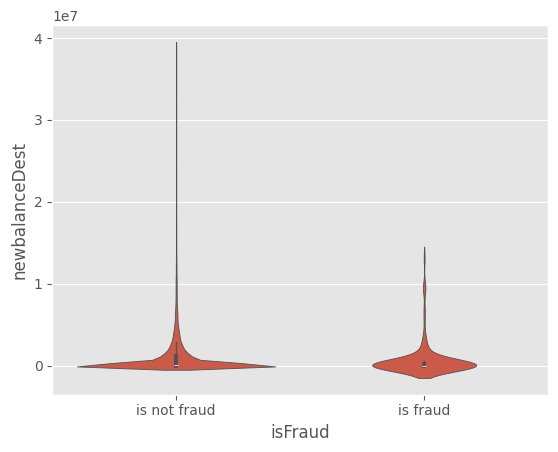

In [ ]:
sns.violinplot(data=df,x='isFraud',y='newbalanceDest')

In [ ]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,179014.000000,179014,1.790140e+05,179013,1.790130e+05,1.790130e+05,179013,1.790130e+05,1.790130e+05,179013
unique,NaN,5,NaN,179010,NaN,NaN,86417,NaN,NaN,2
top,NaN,PAYMENT,NaN,C44568807,NaN,NaN,C985934102,NaN,NaN,is not fraud
freq,NaN,66741,NaN,2,NaN,NaN,81,NaN,NaN,178874
mean,9.739222,NaN,1.801320e+05,NaN,8.915856e+05,9.089488e+05,NaN,9.272605e+05,1.188120e+06,NaN
std,1.999448,NaN,3.335828e+05,NaN,2.814423e+06,2.851534e+06,NaN,2.374230e+06,2.676059e+06,NaN
min,1.000000,NaN,3.200000e-01,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
25%,9.000000,NaN,1.166942e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
50%,10.000000,NaN,6.566817e+04,NaN,1.976200e+04,0.000000e+00,NaN,4.233860e+04,1.163345e+05,NaN
75%,11.000000,NaN,2.268392e+05,NaN,1.935541e+05,2.276798e+05,NaN,7.298561e+05,1.166438e+06,NaN


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,1
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179014 entries, 0 to 179013
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            179014 non-null  int64  
 1   type            179014 non-null  object 
 2   amount          179014 non-null  float64
 3   nameOrig        179013 non-null  object 
 4   oldbalanceOrg   179013 non-null  float64
 5   newbalanceOrig  179013 non-null  float64
 6   nameDest        179013 non-null  object 
 7   oldbalanceDest  179013 non-null  float64
 8   newbalanceDest  179013 non-null  float64
 9   isFraud         179013 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 13.7+ MB


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179013 entries, 0 to 179012
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            179013 non-null  int64  
 1   type            179013 non-null  object 
 2   amount          179013 non-null  float64
 3   nameOrig        179013 non-null  object 
 4   oldbalanceOrg   179013 non-null  float64
 5   newbalanceOrig  179013 non-null  float64
 6   nameDest        179013 non-null  object 
 7   oldbalanceDest  179013 non-null  float64
 8   newbalanceDest  179013 non-null  float64
 9   isFraud         179013 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 15.0+ MB


<Axes: ylabel='amount'>

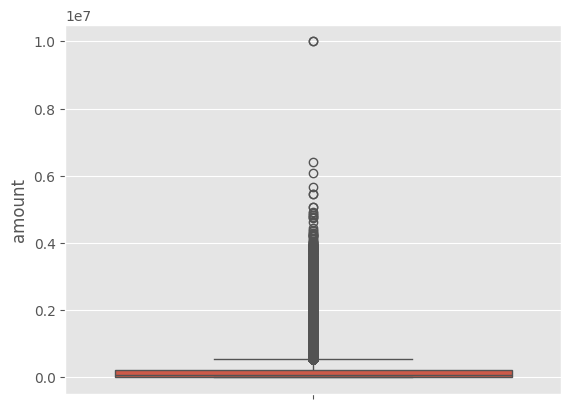

In [ ]:
sns.boxplot(df['amount'])

In [ ]:
print(stats.mode(df['amount']))
print(np.mean(df['amount']))

ModeResult(mode=np.float64(2367.99), count=np.int64(3))
180133.012693715


In [ ]:
q1=np.quantile(df['amount'],0.25)
q3=np.quantile(df['amount'],0.75)
iqr=q3-q1
upper_bound=q3+1.5*iqr
lower_bound=q1-1.5*iqr
print("upperbound:",upper_bound)
print("lower bound:",lower_bound)
print("q1:",q1)
print("q3:",q3)
print("iqr:",iqr)
print("skewed data:",len(df[df['amount']>upper_bound]))
print("skewed data:",len(df[df['amount']<lower_bound]))

upperbound: 549593.805
lower bound: -311084.075
q1: 11670.13
q3: 226839.6
iqr: 215169.47
skewed data: 10832
skewed data: 0


In [ ]:
def transformationplot(feature):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.histplot(feature)
  plt.subplot(1,2,2)
  stats.probplot(feature,plot=plt)


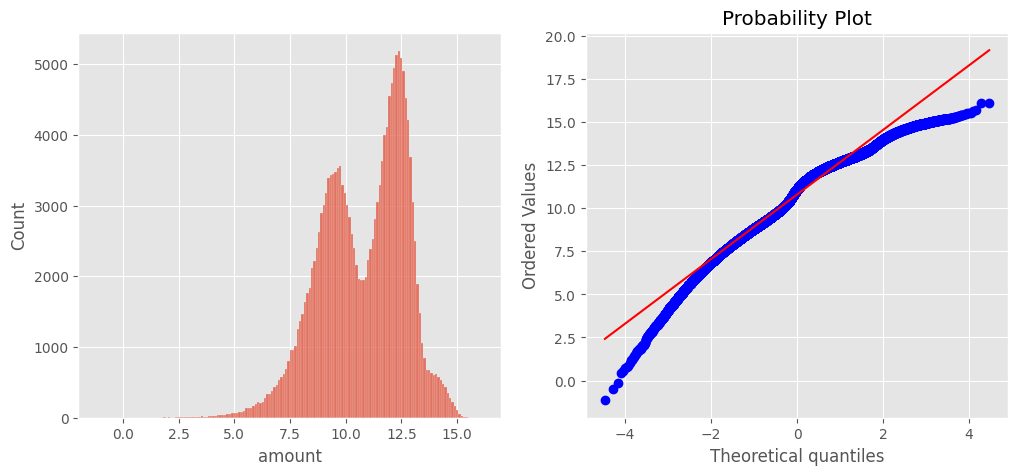

In [ ]:
transformationplot(np.log(df['amount']))

In [ ]:
df['amount']=np.log(df['amount'])

In [ ]:
df['type']=label_encoder.fit_transform(df['type'])

In [ ]:
df['type'].value_counts()

,count
type,
3,66741
1,58910
0,36871
4,14917
2,1574


In [ ]:
x=df.drop('isFraud',axis=1)
y=df['isFraud']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((143210, 9), (35803, 9), (143210,), (35803,))

In [ ]:
model = RandomForestClassifier()

# Drop non-numeric columns 'nameOrig' and 'nameDest' from x_train and x_test
x_train_processed = x_train.drop(['nameOrig', 'nameDest'], axis=1)
x_test_processed = x_test.drop(['nameOrig', 'nameDest'], axis=1)

model.fit(x_train_processed, y_train)

y_pred = model.predict(x_test_processed)

test_accuracy_rfc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9995

Classification Report:
              precision    recall  f1-score   support

    is fraud       0.87      0.43      0.58        30
is not fraud       1.00      1.00      1.00     35773

    accuracy                           1.00     35803
   macro avg       0.93      0.72      0.79     35803
weighted avg       1.00      1.00      1.00     35803


Confusion Matrix:
[[   13    17]
 [    2 35771]]


In [ ]:
y_train_predict_rfc=model.predict(x_train_processed)
train_accuracy_rfc=accuracy_score(y_train,y_train_predict_rfc)
train_accuracy_rfc

1.0

In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train_processed,y_train)
y_test_predict_dtc=dtc.predict(x_test_processed)
test_accuracy_dtc=accuracy_score(y_test,y_test_predict_dtc)
print(test_accuracy_dtc)

0.9994693182135576


In [ ]:
y_train_predict_dtc=dtc.predict(x_train_processed)
train_accuracy_dtc=accuracy_score(y_train,y_train_predict_dtc)
train_accuracy_dtc

1.0

In [ ]:
pd.crosstab(y_test,y_test_predict_dtc)

col_0,is fraud,is not fraud
isFraud,,
is fraud,18,12
is not fraud,7,35766


In [ ]:
print(classification_report(y_test,y_test_predict_dtc))

              precision    recall  f1-score   support

    is fraud       0.72      0.60      0.65        30
is not fraud       1.00      1.00      1.00     35773

    accuracy                           1.00     35803
   macro avg       0.86      0.80      0.83     35803
weighted avg       1.00      1.00      1.00     35803



In [ ]:
etc=ExtraTreesClassifier()
etc.fit(x_train_processed,y_train)
y_test_predict_etc=etc.predict(x_test_processed)
test_accuracy_etc=accuracy_score(y_test,y_test_predict_etc)
print(test_accuracy_etc)

0.9993855263525403


In [ ]:
y_train_predict_etc=etc.predict(x_train_processed)
train_accuracy_etc=accuracy_score(y_train,y_train_predict_etc)
train_accuracy_etc

1.0

In [ ]:
pd.crosstab(y_test,y_test_predict_etc)

col_0,is fraud,is not fraud
isFraud,,
is fraud,8,22
is not fraud,0,35773


In [ ]:
print(classification_report(y_test,y_test_predict_etc))

              precision    recall  f1-score   support

    is fraud       1.00      0.27      0.42        30
is not fraud       1.00      1.00      1.00     35773

    accuracy                           1.00     35803
   macro avg       1.00      0.63      0.71     35803
weighted avg       1.00      1.00      1.00     35803



In [ ]:
svc=SVC()
svc.fit(x_train_processed,y_train)
y_test_predict_svc=svc.predict(x_test_processed)
test_accuracy_svc=accuracy_score(y_test,y_test_predict_svc)
print(test_accuracy_svc)

0.9991620813898276


In [ ]:
y_train_predict_svc=svc.predict(x_train_processed)
train_accuracy_svc=accuracy_score(y_train,y_train_predict_svc)
train_accuracy_svc

0.999259828224286

In [ ]:
pd.crosstab(y_test,y_test_predict_svc)

col_0,is not fraud
isFraud,
is fraud,30
is not fraud,35773


In [ ]:
print(classification_report(y_test,y_test_predict_svc))

              precision    recall  f1-score   support

    is fraud       0.00      0.00      0.00        30
is not fraud       1.00      1.00      1.00     35773

    accuracy                           1.00     35803
   macro avg       0.50      0.50      0.50     35803
weighted avg       1.00      1.00      1.00     35803



In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [ ]:
la=LabelEncoder()
y_train1=la.fit_transform(y_train)
y_test1=la.fit_transform(y_test)
y_test1

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_train1

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
xgb1=xgb.XGBClassifier()
xgb1.fit(x_train_processed,y_train1)
y_test_predict_xgb=xgb1.predict(x_test_processed)
test_accuracy_xgb=accuracy_score(y_test1,y_test_predict_xgb)
print(test_accuracy_xgb)

0.999608971315253


In [ ]:
y_train_predict_xgb=xgb1.predict(x_train_processed)
train_accuracy_xgb=accuracy_score(y_train1,y_train_predict_xgb)
train_accuracy_xgb

0.999993017247399

In [ ]:
pd.crosstab(y_test1,y_test_predict_xgb)

col_0,0,1
row_0,,
0,18,12
1,2,35771


In [ ]:
print(classification_report(y_test1,y_test_predict_xgb))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72        30
           1       1.00      1.00      1.00     35773

    accuracy                           1.00     35803
   macro avg       0.95      0.80      0.86     35803
weighted avg       1.00      1.00      1.00     35803



In [ ]:
def compareModel():
  print("train accuracy for rfc",train_accuracy_rfc)
  print("test accuracy for rfc",test_accuracy_rfc)
  print("train accuracy for dtc",train_accuracy_dtc)
  print("test accuracy for dtc",test_accuracy_dtc)
  print("train accuracy for etc",train_accuracy_etc)
  print("test accuracy for etc",test_accuracy_etc)
  print("train accuracy for svc",train_accuracy_svc)
  print("test accuracy for svc",test_accuracy_svc)
  print("train accuracy for xgb",train_accuracy_xgb)
  print("test accuracy for xgb",test_accuracy_xgb)

In [ ]:
compareModel()

train accuracy for rfc 1.0
test accuracy for rfc 0.9994693182135576
train accuracy for dtc 1.0
test accuracy for dtc 0.9994693182135576
train accuracy for etc 1.0
test accuracy for etc 0.9993855263525403
train accuracy for svc 0.999259828224286
test accuracy for svc 0.9991620813898276
train accuracy for xgb 0.999993017247399
test accuracy for xgb 0.999608971315253


In [ ]:
pickle.dump(svc,open('model.pkl','wb'))